## Proyecto Peleas UFC

### Unidades de observación 
Las peleas de los diferentes eventos realizados por UFC desde 1994 hasta 2021

### Unidad de análisis
Análitica y descriptiva principalmente, aunque también se busca ver las posibilidades de una unidad predictiva (digamos para crear un modelo predictivo de resultados)
### Justificación de datos
Nuestros datos longitudinales ya que tienen "resultados repetitivos" a lo largo del tiempo  
También porque en varias ocasiones a los sujetos les aplican las mismas mediciones

### clasificación de variables/columnas

FIGHT_ID – Nominal  
EVENT_ID – Nominal  
FIGHT_NAME – Nominal  
FIGHT_WEIGHTCLASS – Nominal  
FIGHT_METHOD – Nominal  
ROUND – Ordinal  
TIME – Intervalo  
FIGHT_TIME_FORMAT – Nominal  
FIGHT_REFEREE – Nominal  
FIGHT_DETAILS – Nominal  
MINUTE - Razón  
SECOND - Razón  
DATE_YMD - Intervalo
EVENT_DATE - Intervalo
FIGHT_STUB, EVENT_NAME, EVENT_LOCATION, EVENT_STUB, URL – Nominal  
FIGHT_WINNER – Nominal 

## Alta - Baja Cardinalidad (Nominales)

FIGHT - Alta

EVENT - Alta 

FightWeight - Baja

FightMethod - Alta

FightTimeFormat - Baja

Fight_Referee - Baja

Fight_Details - Alta

Fight_Winner - Alta

FIGHT_STUB EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL – Alta 

FIGHT_WINNER – Alta

## Categoricos balanceados
Round

## Categoricos no balanceados
FIGHT_ID   
EVENT_ID 
FIGHT_NAME
FIGHT_WEIGHTCLASS 
FIGHT_METHOD  
FIGHT_STUB, EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL 
FIGHT_WINNER 

## Division de variables

Juan pedro

Horacio

Yaotecatl
    EVENT_ID


In [1]:
#Importacion de librerias
import numpy as np
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [2]:
df = pd.read_csv('ufc-fight-metadata.csv', encoding='utf-8')

In [3]:
df_backup = df.copy()
# df

In [4]:
# Lista de nombres de columnas
col = df.columns
# col

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIGHT_ID           6662 non-null   int64 
 1   EVENT_ID           6662 non-null   int64 
 2   FIGHT_NAME         6662 non-null   object
 3   FIGHT_WEIGHTCLASS  6662 non-null   object
 4   FIGHT_METHOD       6662 non-null   object
 5   ROUND              6662 non-null   int64 
 6   TIME               6662 non-null   object
 7   FIGHT_TIME_FORMAT  6662 non-null   object
 8   FIGHT_REFEREE      6662 non-null   object
 9   FIGHT_DETAILS      6662 non-null   object
 10  MINUTE             6662 non-null   int64 
 11  SECOND             6662 non-null   int64 
 12  FIGHT_STUB         6662 non-null   object
 13  EVENT_NAME         6662 non-null   object
 14  EVENT_DATE         6662 non-null   object
 15  EVENT_LOCATION     6662 non-null   object
 16  EVENT_STUB         6662 non-null   object


In [6]:
nominales = ['FIGHT_ID', 'EVENT_ID', 'FIGHT_NAME','FIGHT_METHOD','FIGHT_DETAILS','FIGHT_STUB','EVENT_NAME','EVENT_LOCATION','EVENT_STUB','URL','FIGHT_WINNER']
nominales_baja_cardinalidad = ['FIGHT_WEIGHTCLASS', 'FIGHT_TIME_FORMAT', 'FIGHT_REFEREE']
ordinales = ['ROUND'] 
intervalo = ['TIME','EVENT_DATE','DATE_YMD']
razon = ['MINUTE', 'SECOND']

In [7]:
for i in nominales_baja_cardinalidad:
    df[i] = df[i].astype('category')    

In [10]:
for i in nominales_baja_cardinalidad + ordinales:
    print(i)
    df[i].unique()
    print()    

FIGHT_WEIGHTCLASS


['Light Heavyweight', 'Featherweight', 'Women&#039;s Featherweight', 'Women&#039;s Flyweight', 'Women&#039;s Bantamweight', ..., 'Ultimate Fighter 4 Welterweight Tournament Ti..., 'Ultimate Fighter 2 Heavyweight Tournament Title', 'Ultimate Fighter 1 Light Heavyweight Tourname..., 'UFC Interim Flyweight Title', 'Ultimate Fighter Latin America 2 Welterweight...]
Length: 109
Categories (109, object): ['Bantamweight', 'Catch Weight', 'Featherweight', 'Flyweight', ..., 'Women&#039;s Bantamweight', 'Women&#039;s Featherweight', 'Women&#039;s Flyweight', 'Women&#039;s Strawweight']


FIGHT_TIME_FORMAT


['3 Rnd (5-5-5)', '5 Rnd (5-5-5-5-5)', '3 Rnd + OT (5-5-5-5)', '1 Rnd + OT (12-3)', '1 Rnd (20)', ..., '1 Rnd + OT (30-3)', '1 Rnd (30)', '1 Rnd + OT (31-5)', 'No Time Limit', '1 Rnd (12)']
Length: 19
Categories (19, object): ['1 Rnd (10)', '1 Rnd (12)', '1 Rnd (15)', '1 Rnd (18)', ..., '3 Rnd (5-5-5)', '3 Rnd + OT (5-5-5-5)', '5 Rnd (5-5-5-5-5)', 'No Time Limit']


FIGHT_REFEREE


['Yves Lavigne', 'Wolf Menninger', 'Will Fisher', 'Wernei Cardoso', 'Wayne Spinola', ..., 'Al Wichgers', 'Al Guinee', 'Al Coley', 'Adam Martinez', 'Adam Cheadle']
Length: 208
Categories (208, object): ['Adam Cheadle', 'Adam Martinez', 'Al Coley', 'Al Guinee', ..., 'Wernei Cardoso', 'Will Fisher', 'Wolf Menninger', 'Yves Lavigne']


ROUND


array([3, 1, 2, 5, 4], dtype=int64)

In [9]:
for i in nominales_baja_cardinalidad + ordinales:
    print(i)
    df[i].value_counts()
    print()

FIGHT_WEIGHTCLASS


FIGHT_WEIGHTCLASS
Lightweight                                           1119
Welterweight                                          1105
Middleweight                                           856
Featherweight                                          604
Heavyweight                                            571
                                                      ... 
Ultimate Fighter 15 Lightweight Tournament Title         1
Ultimate Fighter 14 Bantamweight Tournament Title        1
Ultimate Fighter 13 Welterweight Tournament Title        1
Ultimate Fighter 12 Lightweight Tournament Title         1
Ultimate Fighter 14 Featherweight Tournament Title       1
Name: count, Length: 109, dtype: int64


FIGHT_TIME_FORMAT


FIGHT_TIME_FORMAT
3 Rnd (5-5-5)           5866
5 Rnd (5-5-5-5-5)        578
1 Rnd + OT (12-3)         79
No Time Limit             29
3 Rnd + OT (5-5-5-5)      26
1 Rnd (20)                21
1 Rnd + 2OT (15-3-3)      20
2 Rnd (5-5)               13
1 Rnd (15)                 8
1 Rnd (10)                 6
1 Rnd (12)                 4
1 Rnd + OT (30-5)          3
1 Rnd (18)                 2
1 Rnd + OT (15-3)          2
1 Rnd + OT (27-3)          1
1 Rnd + OT (30-3)          1
1 Rnd + OT (31-5)          1
1 Rnd + 2OT (24-3-3)       1
1 Rnd (30)                 1
Name: count, dtype: int64


FIGHT_REFEREE


FIGHT_REFEREE
Herb Dean               998
John McCarthy           639
Dan Miragliotta         419
Mario Yamasaki          392
Marc Goddard            391
                       ... 
Tom Jones                 1
Ivan Svec                 1
Steven Davis              1
Brandon Pfannenstiel      1
Gabe Barahona             1
Name: count, Length: 208, dtype: int64


ROUND


ROUND
3    3353
1    1932
2    1102
5     237
4      38
Name: count, dtype: int64

In [11]:
#Comentario de la maestra
# ¿Qué concluyen de celdas este tipo de celdas?
moda = df['ROUND'].mode().iloc[0]
median = df['ROUND'].median()
print(moda)
print(median)


3
3.0


In [13]:
df[razon].describe()

,MINUTE,SECOND
count,6662.000000,6662.000000
mean,3.508256,16.205194
std,1.835489,19.726635
min,0.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,3.000000
75%,5.000000,32.000000
max,18.000000,59.000000


In [14]:
df.TIME = df['TIME'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
# Calcula la mediana, moda y desviación estándar
median = df['TIME'].median()
mode = df['TIME'].mode()
std = df['TIME'].std()

# Calcula los cuartiles
q1 = df['TIME'].quantile(0.25)
q3 = df['TIME'].quantile(0.75)
iqr = q3 - q1
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std)
print("Interquartilic Range: ", iqr)



Median: 287.0
Mode: 0    300
Name: TIME, dtype: int64
Standard Deviation: 99.12629396653747
Interquartilic Range:  152.0


# Tomen de aqui lo que les sirva
Estadistica descriptiva de las columnas (Algunas omitidas como URL y STUBS)

TIME – Media: 287 - Moda: 300 - DE: 99.15009 - Rango Interquartilico: 152

FIGHT_TIME_FORMAT -Moda: 3RND (5-5-5)  

FIGHT_REFEREE – Moda: HERB DEAN

FIGHT_DETAILS – Moda: DECISION

MINUTE - Media: 4 - Moda: 5 - D.E: 1.83564 - RANGO INTERQUARTILICO: 32

SECOND - Media: 3 - Moda: no - D.E: 19.7326 - Rango: 32

EVENT_NAME - Moda: UFC 259: Blachowicz vs. Adesanya

EVENT_DATE - Moda: November 19,2016

EVENT_LOCATION - Moda: Las Vegas, Nevada, USA

DATE_YMD - Moda: 19/11/2016    

FIGHT_WINNER – Moda: DONALD CERRONE

### Variable EVENT_ID
Event_id refiere a un indentificador único para cada evento realizado, dicho identificador es utilizado por cada pelea para referirse al evento al que pertenecen. Aprovechando esta relación podemos conocer qué eventos tienen la mayor cantidad de peleas y apoyandonos de otra columna, por ejemplo DATE_YMD, saber si hay alguna tendencia a reducir la cantidad de peleas por evento con el paso del tiempo

##### Interpretación
La primer gráfica nos muestra los eventos con más peleas y de ahí podemos ver que nunca ha habido un evento con más de 15 peleas, de ahí vemos que va bajando. Esto lo complementamos con la segunda gráfica que nos muestra los eventos con menos peleas, siendo 6 el minimo. Adelantando un poco al analisis bivariado cabe recalcar que 4 de los 8 eventos con 6 peleas se realizaron durante la pandemia.

Estos dos datos se podrían utilizar para realizar eventos que superen la media o realizando un análisis junto a los datos de audiencia ver qué tan rentable és realizar eventos con pocas o excesivas peleas. 

Finalmente, me gustaría agregar un par de datos a considerar, en este ultimo caso, para decidir la cantidad de peleas por evento, la tanto la moda y el promedio tienen valores muy similares moda:12 y promedio:10.85 (redondeamos a 11), por lo que salvo eventos especiales no consideramos una gran idea alejarse de esa cantidad de peleas.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_ID'>

Text(0.5, 1.0, 'Top 10 eventos con mas peleas')

Text(0.5, 0, 'Event ID')

Text(0, 0.5, 'Numero de Peleas')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1718'),
  Text(1, 0, '1166'),
  Text(2, 0, '1136'),
  Text(3, 0, '1132'),
  Text(4, 0, '1268'),
  Text(5, 0, '1733'),
  Text(6, 0, '1727'),
  Text(7, 0, '1721'),
  Text(8, 0, '1138'),
  Text(9, 0, '1154')])

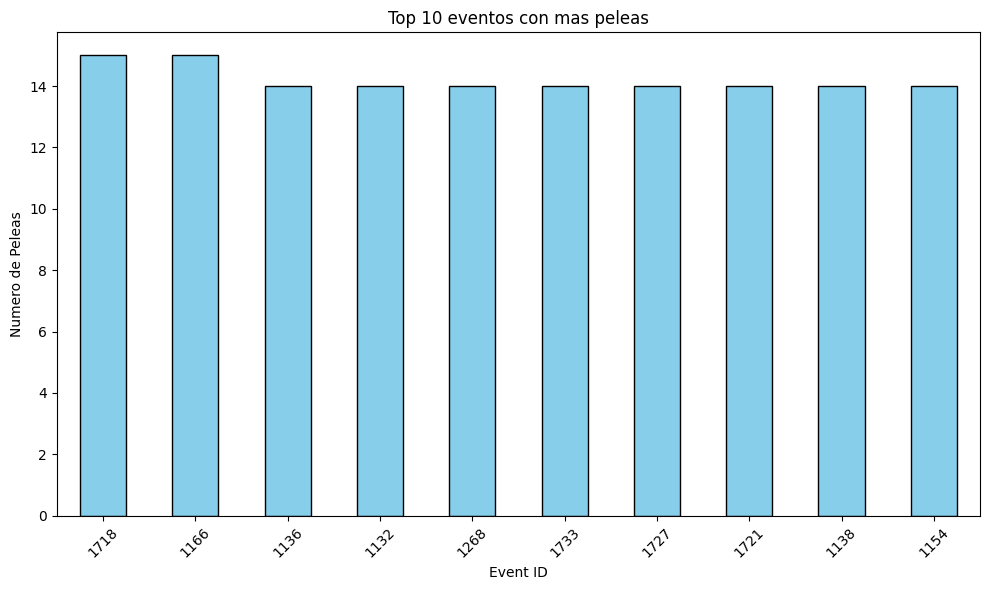

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_ID'>

Text(0.5, 1.0, 'Top 10 eventos con menos peleas')

Text(0.5, 0, 'Event ID')

Text(0, 0.5, 'Numero de Peleas')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1176'),
  Text(1, 0, '1692'),
  Text(2, 0, '1694'),
  Text(3, 0, '1701'),
  Text(4, 0, '1717'),
  Text(5, 0, '1678'),
  Text(6, 0, '1691'),
  Text(7, 0, '1708'),
  Text(8, 0, '1726'),
  Text(9, 0, '1702')])

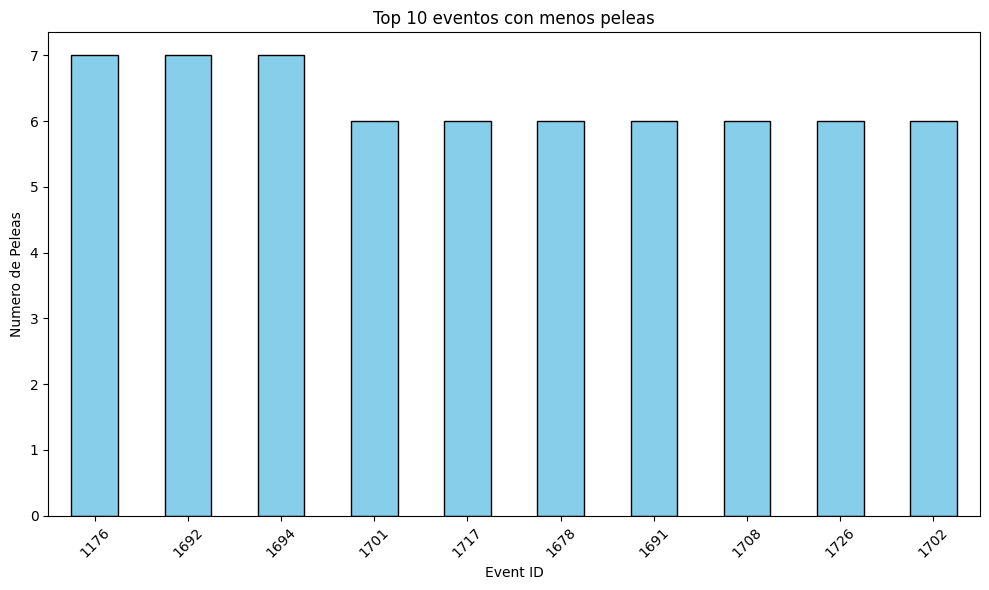

Promedio de eventos por pelea:  10.850162866449512
Moda en la cantidad de eventos:  0    12
Name: count, dtype: int64


In [34]:
#Contamos cuantas veces aparece cada identificador
event_counts = df['EVENT_ID'].value_counts()

#Tomamos los primeros 10
top_10_events = event_counts.head(10)

#Con esos primeros 10 realizamos una gráfica de barras
plt.figure(figsize=(10, 6))
top_10_events.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 eventos con mas peleas')
plt.xlabel('Event ID')
plt.ylabel('Numero de Peleas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Ahora realizamos una gráfica con los ultimos 10
last_10 = event_counts.tail(10)

plt.figure(figsize=(10, 6))
last_10.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 eventos con menos peleas')
plt.xlabel('Event ID')
plt.ylabel('Numero de Peleas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#contamos el promedio
promedio = event_counts.mean()
print('Promedio de eventos por pelea: ', promedio)

moda = event_counts.mode()
print('Moda en la cantidad de eventos: ', moda)

### Variable FIGHT_NAME
FIGHT_NAME resume los nombres de los peleadores, lo que nos ayuda a encontrar la frecuencia de los enfrentamientos entre los peleadores. 

##### Interpretacion
Realizamos una gráfica de frecuencia para conocer los enfrentamientos que más se repitieron, los resultados nos sorprendieron siendo como máximo 3 las ocasiones en las que dos peleadores se enfrentaron y teniendo como moda una sola ocasión. Encontramos en esta columna una gran área de oportunidad, crear rivalidades buscando más audiencia, tomando como referencia otros deportes en los que la misma organización busca "prender" las batallas.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='FIGHT_NAME'>

Text(0.5, 1.0, 'Frecuencia de enfrentamientos')

Text(0.5, 0, 'Peleadores')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Tito Ortiz v Ken Shamrock'),
  Text(1, 0, 'Matt Hughes v BJ Penn'),
  Text(2, 0, 'Chuck Liddell v Randy Couture'),
  Text(3, 0, 'Forrest Griffin v Tito Ortiz'),
  Text(4, 0, 'Anderson Silva v Chael Sonnen')])

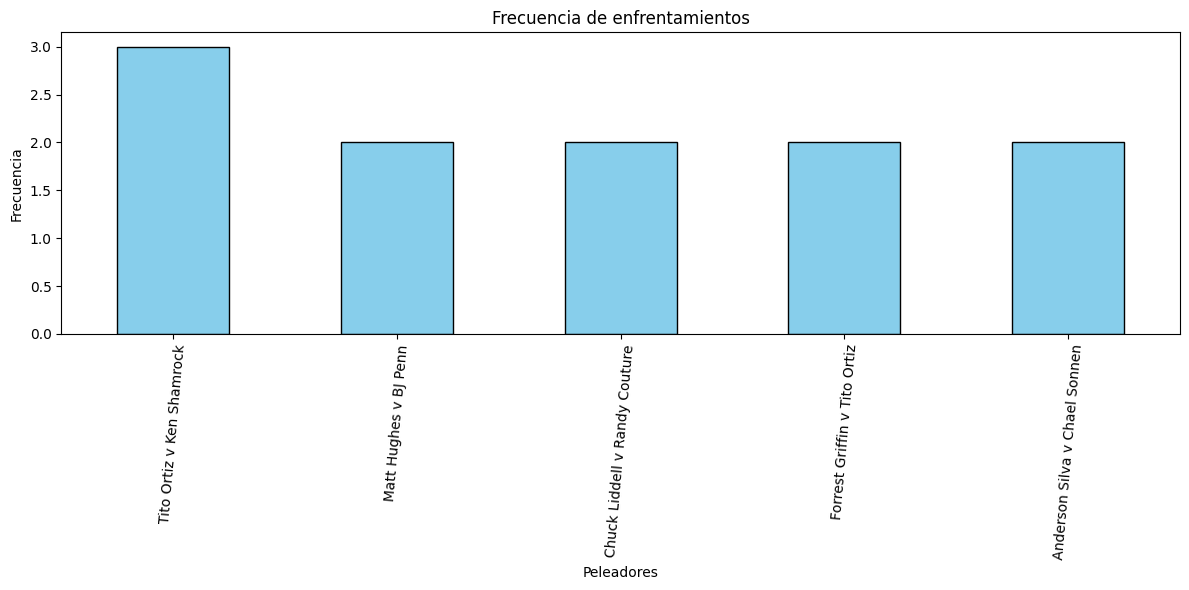

Moda en la repeticion de enfrentamientos:  0    1
Name: count, dtype: int64


In [38]:
#Realizamos el conteo de frecuencia
fight_name_count = df['FIGHT_NAME'].value_counts()

#Tomamos los primeros 5
top_10_fight_names = fight_name_count.head(5)

#Realizamos la grafica
plt.figure(figsize=(12, 6))
top_10_fight_names.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de enfrentamientos')
plt.xlabel('Peleadores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

#Encontramos la moda 
moda = fight_name_count.mode()
print('Moda en la repeticion de enfrentamientos: ', moda)

### Variable FIGHT_WEIGHTCLASS
FIGHT_WEIGHTCLASS es la categoría de cada pelea, además de la división varonil y femenil existen otras divisiones por peso. Para la categoría varonil exiten 9, desde las 115 libras (peso paja) hasta 265 libras (peso pesado). Para la femenil existen unicamente 5, que van desde las 105 libras (pero átomo) hasta las 155 libras (peso ligero)

##### Interpretación
En esta ocasión lo principal es encontrar la frecuencia, al encontrarla podemos ver qué categorías abarcan más peleas.
Al graficar la frecuencia vemos que las categorías más repetidas son las categorías lightweight, welterweight, middleweight. Estas corresponden a un rango de peso de 155 a 185 libras siendo el promedio de peso de un hombre adulto, es decir, la mayoría de peleas/peleadores tienen peso promedio.



<BarContainer object of 5 artists>

Text(0.5, 0, 'Categoria')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Lightweight'),
  Text(1, 0, 'Welterweight'),
  Text(2, 0, 'Middleweight'),
  Text(3, 0, 'Featherweight'),
  Text(4, 0, 'Heavyweight')])

Text(0, 0.5, 'Cantidad')

Text(0.5, 1.0, 'top 5 Peleas por categoria')

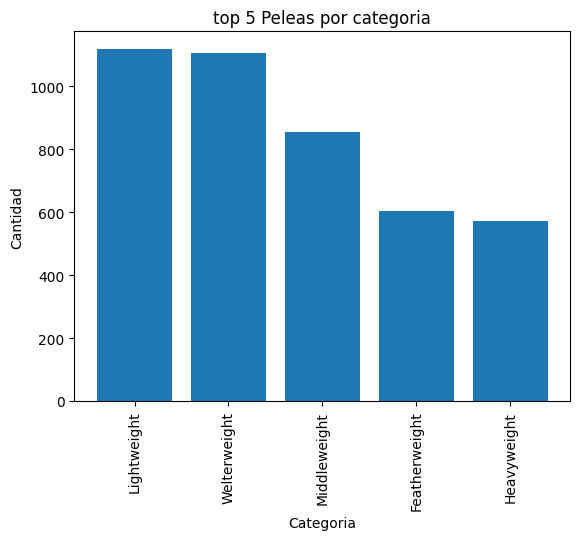

In [49]:
weightClass = df['FIGHT_WEIGHTCLASS'].value_counts()
weightClass = weightClass.head()


plt.bar(weightClass.index, weightClass.values)
plt.xlabel('Categoria')
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.title('top 5 Peleas por categoria')
plt.show()


### Variable FIGHT_METHOD
FIGHT_METHOD muestra el medio por el que terminó cada pelea, es similar a FIGHT_DETAILS solo que en esa columna se desgloza más el tipo KO/TKO

##### Interpretacion
Realizamos una gráfica de frecuencia para conocer los más repetidos, y vemos que es decisión unánime (los 3 jueces votaron al mismo), el segundo es KO/TKO y el tercero summisión, esta información se podría utilizar en el ámbito de las apuestas, al inicio de cada pelea se puede dar un momio mayor o menor dependiendo de estos datos.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FIGHT_METHOD'>

Text(0.5, 1.0, ' Frecuencia de Metodo de Pelea')

Text(0.5, 0, 'Metodo de Pelea')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Decision - Unanimous'),
  Text(1, 0, 'KO/TKO'),
  Text(2, 0, 'Submission'),
  Text(3, 0, 'Decision - Split'),
  Text(4, 0, 'Decision - Majority'),
  Text(5, 0, 'TKO - Doctor&#039;s Stoppage'),
  Text(6, 0, 'Overturned'),
  Text(7, 0, 'Could Not Continue'),
  Text(8, 0, 'DQ'),
  Text(9, 0, 'Other')])

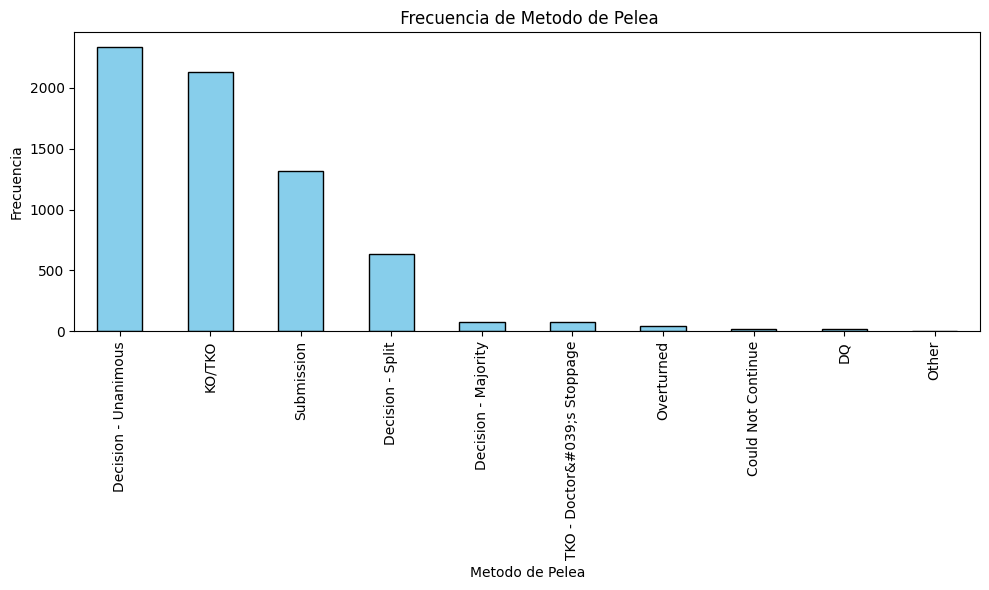

In [56]:
fight_method_counts = df['FIGHT_METHOD'].value_counts()

top_10_fight_method = fight_method_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_fight_method.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(' Frecuencia de Metodo de Pelea')
plt.xlabel('Metodo de Pelea')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Variable ROUND
ROUND contiene el round de finalización de las peleas, cada pelea tiene desde 1 hasta 5 rounds cada uno de 5 min.

##### Interpretación
Los resultados de la grafica de frecuencia nos dicen que el round de finalización más común, o moda, es el tercero y sorprendentemente el segundo más común es el primer round. Finalmente, al parecer en las peleas que son de 5 rounds lo más probable es que el 4to round sea de descanso o preparación para el 5to. 

0    3
Name: ROUND, dtype: int64


<BarContainer object of 5 artists>

Text(0.5, 0, 'Numero de round')

Text(0, 0.5, 'Numero de peleas')

Text(0.5, 1.0, 'Round de finalizacion de las peleas')

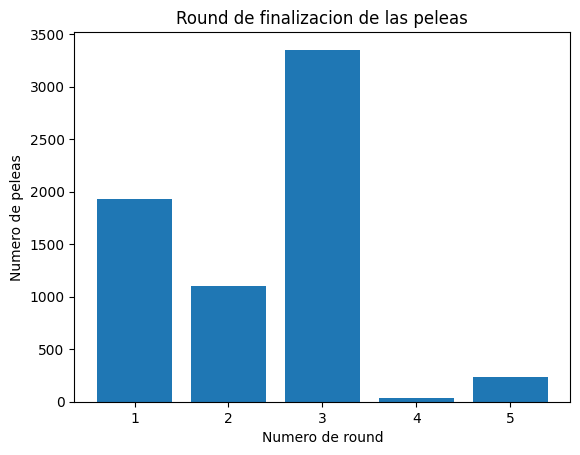

In [54]:
round = df['ROUND'].value_counts()

plt.bar(round.index, round.values)
plt.xlabel('Numero de round')
plt.ylabel('Numero de peleas')
plt.title('Round de finalizacion de las peleas')
plt.show()

### Variable FIGHT_TIME_FORMAT
No se me ocurre nada

<BarContainer object of 19 artists>

Text(0.5, 0, 'Formato de pelea')

Text(0, 0.5, 'Peleas con dicho formato')

Text(0.5, 1.0, 'Formato de peleas')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '3 Rnd (5-5-5)'),
  Text(1, 0, '5 Rnd (5-5-5-5-5)'),
  Text(2, 0, '1 Rnd + OT (12-3)'),
  Text(3, 0, 'No Time Limit'),
  Text(4, 0, '3 Rnd + OT (5-5-5-5)'),
  Text(5, 0, '1 Rnd (20)'),
  Text(6, 0, '1 Rnd + 2OT (15-3-3)'),
  Text(7, 0, '2 Rnd (5-5)'),
  Text(8, 0, '1 Rnd (15)'),
  Text(9, 0, '1 Rnd (10)'),
  Text(10, 0, '1 Rnd (12)'),
  Text(11, 0, '1 Rnd + OT (30-5)'),
  Text(12, 0, '1 Rnd (18)'),
  Text(13, 0, '1 Rnd + OT (15-3)'),
  Text(14, 0, '1 Rnd + OT (27-3)'),
  Text(15, 0, '1 Rnd + OT (30-3)'),
  Text(16, 0, '1 Rnd + OT (31-5)'),
  Text(17, 0, '1 Rnd + 2OT (24-3-3)'),
  Text(18, 0, '1 Rnd (30)')])

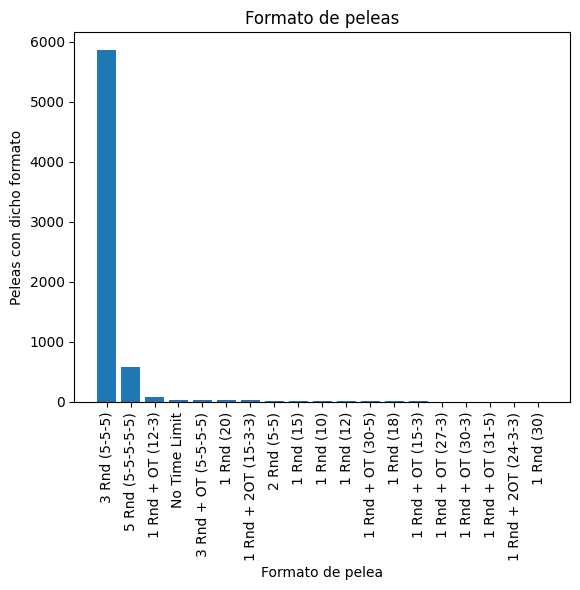

In [19]:
# Si sale en la grafica es que al menos aparece una vez en el dataset
fightFormat = df['FIGHT_TIME_FORMAT'].value_counts()

plt.bar(fightFormat.index, fightFormat.values)
plt.xlabel('Formato de pelea')
plt.ylabel('Peleas con dicho formato')
plt.title('Formato de peleas')
plt.xticks(rotation=90)

plt.show()

### Variable Time
Minuto de finalización de las peleas

### Variable FIGHT_REFEREE
que referees han sido historicamente los que mas han tenido peleas

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Herb Dean'),
  Text(1, 0, 'John McCarthy'),
  Text(2, 0, 'Dan Miragliotta'),
  Text(3, 0, 'Mario Yamasaki'),
  Text(4, 0, 'Marc Goddard'),
  Text(5, 0, 'Chris Tognoni'),
  Text(6, 0, 'Yves Lavigne'),
  Text(7, 0, 'Keith Peterson'),
  Text(8, 0, 'Jason Herzog'),
  Text(9, 0, 'Mark Smith')])

Text(0.5, 0, 'Nombre')

Text(0, 0.5, 'Peleas arbitradas')

Text(0.5, 1.0, 'Arbitros con mas peleas')

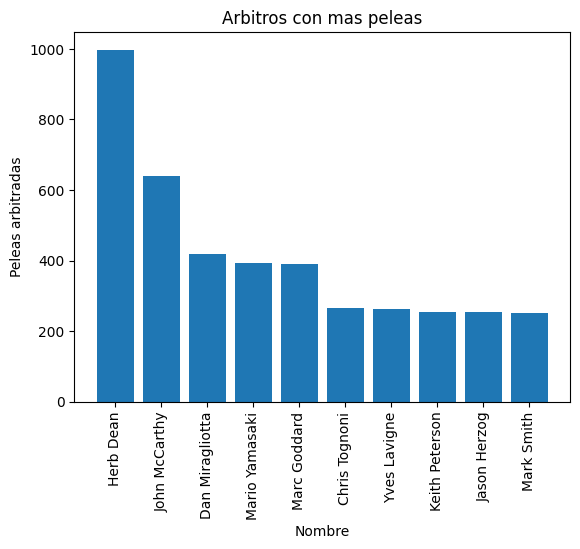

In [16]:
frecuencia = df['FIGHT_REFEREE'].value_counts()
top10Winners = frecuencia.head(10)

plt.bar(top10Winners.index, top10Winners.values)
plt.xticks(rotation=90)

plt.xlabel('Nombre')
plt.ylabel('Peleas arbitradas')
plt.title('Arbitros con mas peleas')

plt.show()

### Variable FIGHT_DETAILS
Marcar una tendencia con similar o que complemente a FIGHT_METHOD

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Decision'),
  Text(1, 0, 'Decision - Split'),
  Text(2, 0, 'Punch to Head At Distance'),
  Text(3, 0, 'Rear Naked Choke'),
  Text(4, 0, 'Punches to Head At Distance'),
  Text(5, 0, 'Punches to Head On Ground'),
  Text(6, 0, 'Punch to Head In Clinch'),
  Text(7, 0, 'Kick to Head At Distance'),
  Text(8, 0, 'Punches to Head From Mount'),
  Text(9, 0, 'Punches to Head From Back Control')])

Text(0.5, 0, 'Tipo de victoria')

Text(0, 0.5, 'Cantidad')

Text(0.5, 1.0, 'Victorias mas comunes')

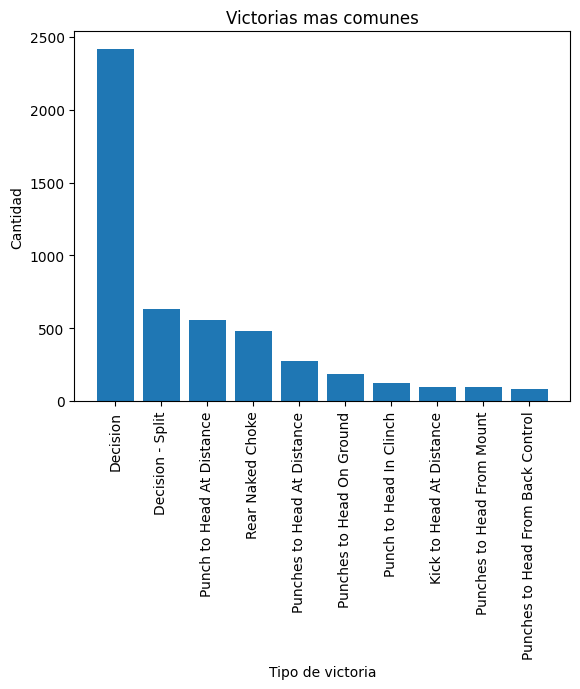

In [17]:
fightDetails = df['FIGHT_DETAILS'].value_counts()
topFightEndUp = fightDetails.head(10)
plt.bar(topFightEndUp.index, topFightEndUp.values)
plt.xticks(rotation=90)

plt.xlabel('Tipo de victoria')
plt.ylabel('Cantidad')
plt.title('Victorias mas comunes')

plt.show()

### Variable FIGHT_STUB
No creo que encontremos nada que hacer con esta, es practicamente la misma informacion que fight_name

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FIGHT_STUB'>

Text(0.5, 1.0, 'Top 10 stub de peleas ')

Text(0.5, 0, 'stub de pelea')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'tito-ortiz-v-ken-shamrock'),
  Text(1, 0, 'anthony-pettis-v-donald-cerrone'),
  Text(2, 0, 'jacare-souza-v-chris-camozzi'),
  Text(3, 0, 'deiveson-figueiredo-v-brandon-moreno'),
  Text(4, 0, 'matt-serra-v-chris-lytle'),
  Text(5, 0, 'sam-stout-v-spencer-fisher'),
  Text(6, 0, 'oleg-taktarov-v-dave-beneteau'),
  Text(7, 0, 'jon-jones-v-alexander-gustafsson'),
  Text(8, 0, 'jon-fitch-v-thiago-alves'),
  Text(9, 0, 'tyron-woodley-v-stephen-thompson')])

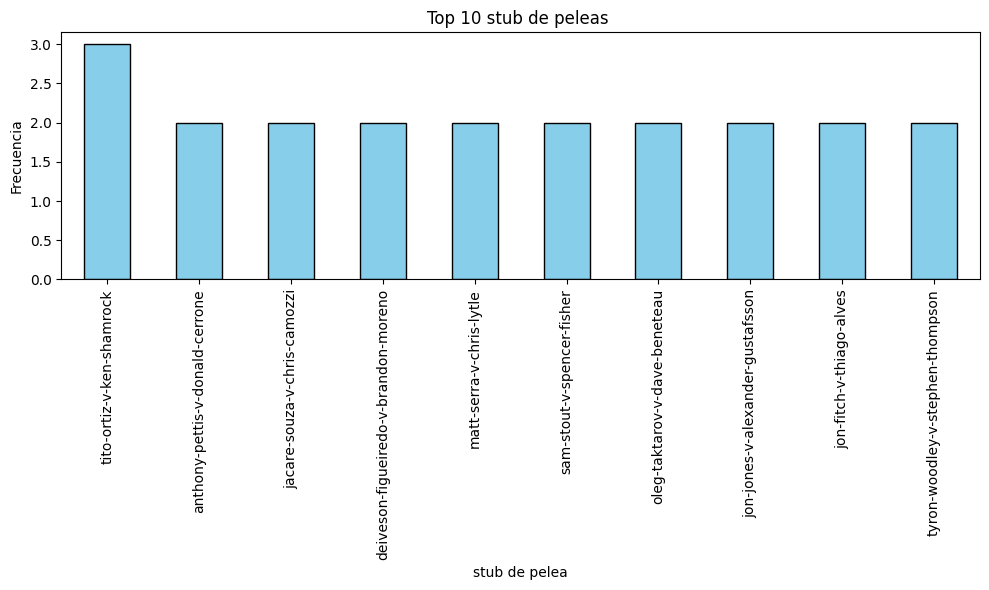

In [27]:
import matplotlib.pyplot as plt

fight_stub = df['FIGHT_STUB'].value_counts()

top_10_fight_stub = fight_stub.head(10)

plt.figure(figsize=(10, 6))
top_10_fight_stub.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 stub de peleas ')
plt.xlabel('stub de pelea')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Variable EVENT_STUB
Nada

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_STUB'>

Text(0.5, 1.0, 'Top 10 stub de eventos ')

Text(0.5, 0, 'stub de evento')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ufc-2-no-way-out'),
  Text(1, 0, 'ufc-259-blachowicz-vs-adesanya'),
  Text(2, 0, 'ufc-fight-night-covington-vs-woodley'),
  Text(3, 0, 'ufc-fight-night-blaydes-vs-aspinall'),
  Text(4, 0, 'ufc-fight-night-smith-vs-spann'),
  Text(5, 0, 'ufc-fight-night-whittaker-vs-till'),
  Text(6, 0, 'ufc-fight-night-joanna-vs-waterson'),
  Text(7, 0, 'ufc-269-oliveira-vs-poirier'),
  Text(8, 0, 'ufc-268-usman-vs-covington-2'),
  Text(9, 0, 'ufc-fight-night-marreta-vs-anders')])

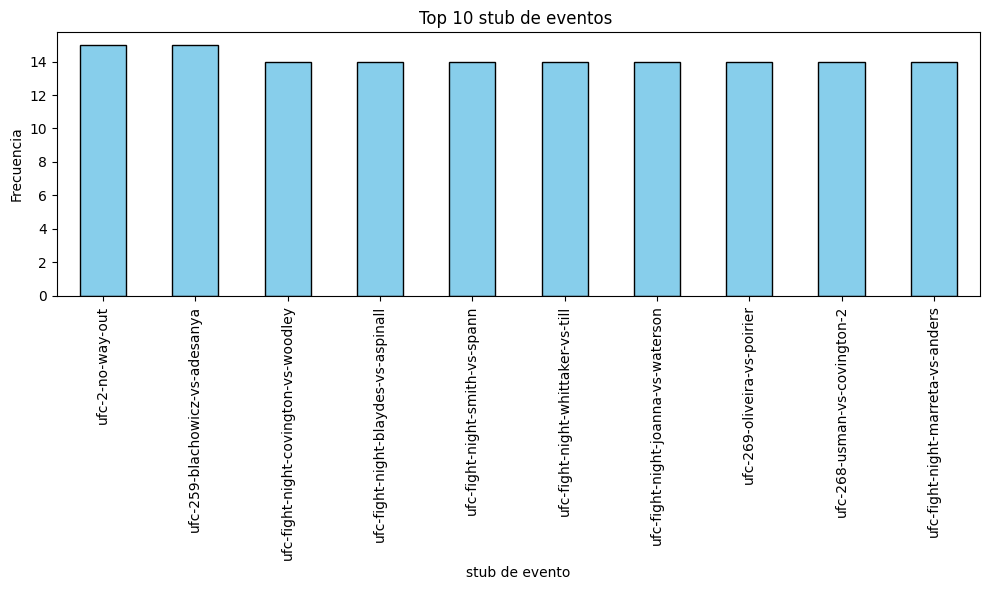

In [26]:
import matplotlib.pyplot as plt

event_stub = df['EVENT_STUB'].value_counts()

top_10_event_stub = event_stub.head(10)

plt.figure(figsize=(10, 6))
top_10_event_stub.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 stub de eventos ')
plt.xlabel('stub de evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Variable EVENT_NAME
Igual que la anterior

### Variable EVENT_DATE
Se podria hacer un analisis para saber en que año se hicieron más eventos o en qué mes se suelen realizar más peleas

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_DATE'>

Text(0.5, 1.0, 'Top 10 fechas de eventos ')

Text(0.5, 0, 'Fecha de evento')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'November 19, 2016'),
  Text(1, 0, 'October 04, 2014'),
  Text(2, 0, 'May 31, 2014'),
  Text(3, 0, 'August 23, 2014'),
  Text(4, 0, 'June 28, 2014'),
  Text(5, 0, 'March 06, 2021'),
  Text(6, 0, 'March 11, 1994'),
  Text(7, 0, 'October 30, 2021'),
  Text(8, 0, 'September 18, 2021'),
  Text(9, 0, 'March 12, 2022')])

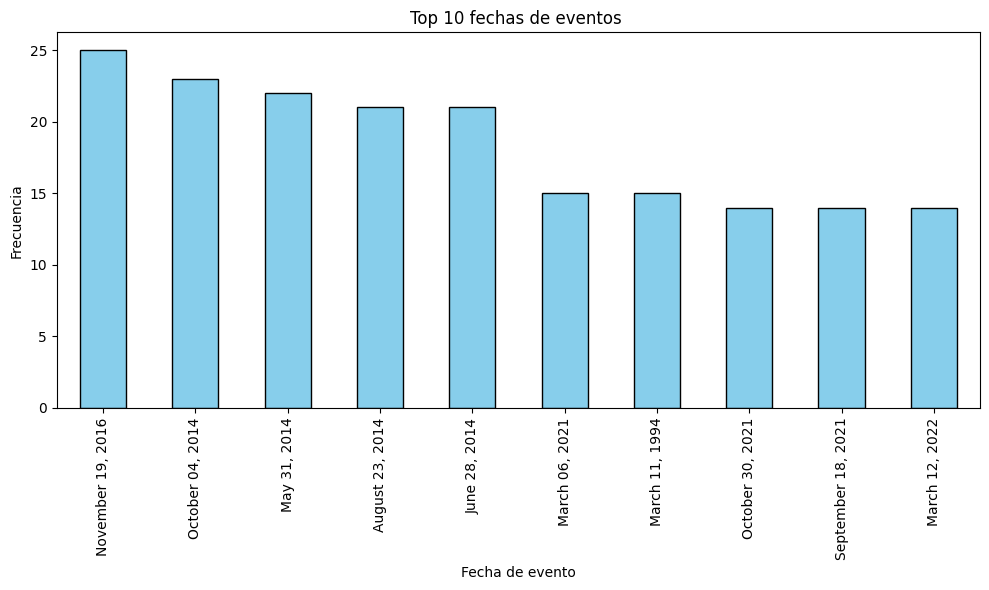

In [25]:
import matplotlib.pyplot as plt

event_date = df['EVENT_DATE'].value_counts()

top_10_event_date = event_date.head(10)

plt.figure(figsize=(10, 6))
top_10_event_date.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 fechas de eventos ')
plt.xlabel('Fecha de evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Variable EVENT_LOCATION
Saber cuales son las ciudades que suelen recibir más eventos

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='EVENT_LOCATION'>

Text(0.5, 1.0, 'Top 10 locaciones de eventos ')

Text(0.5, 0, 'Locacion de evento')

Text(0, 0.5, 'Frecuencia')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Las Vegas, Nevada, USA'),
  Text(1, 0, 'Abu Dhabi, Abu Dhabi, United Arab Emirates'),
  Text(2, 0, 'London, England, United Kingdom'),
  Text(3, 0, 'Anaheim, California, USA'),
  Text(4, 0, 'Houston, Texas, USA'),
  Text(5, 0, 'Newark, New Jersey, USA'),
  Text(6, 0, 'Chicago, Illinois, USA'),
  Text(7, 0, 'Montreal, Quebec, Canada'),
  Text(8, 0, 'Los Angeles, California, USA'),
  Text(9, 0, 'Atlantic City, New Jersey, USA')])

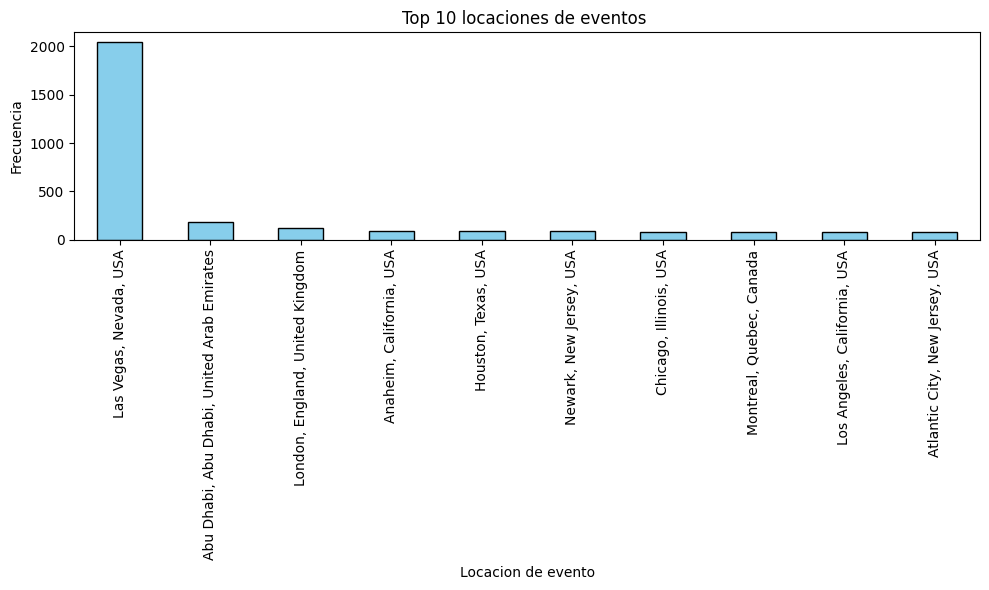

In [23]:
import matplotlib.pyplot as plt

event_location = df['EVENT_LOCATION'].value_counts()

top_10_event_location = event_location.head(10)

plt.figure(figsize=(10, 6))
top_10_event_location.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 locaciones de eventos ')
plt.xlabel('Locacion de evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Variable DATE_YMD
Es la misma que EVENT_DATE podríamos decidir cual de las dos usar por el formato

### Variable URL 
Nada 

### Variable FIGHT_WINNER
Obtener el top de los peleadores con más victorias

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Jim Miller'),
  Text(1, 0, 'Donald Cerrone'),
  Text(2, 0, 'Demian Maia'),
  Text(3, 0, 'Charles Oliveira'),
  Text(4, 0, 'Jon Jones'),
  Text(5, 0, 'Andrei Arlovski'),
  Text(6, 0, 'Rafael Dos Anjos'),
  Text(7, 0, 'Dustin Poirier'),
  Text(8, 0, 'Georges St-Pierre'),
  Text(9, 0, 'Michael Bisping')])

Text(0.5, 0, 'Nombre')

Text(0, 0.5, 'Numero de peleas')

Text(0.5, 1.0, 'Peleadores con mas victorias')

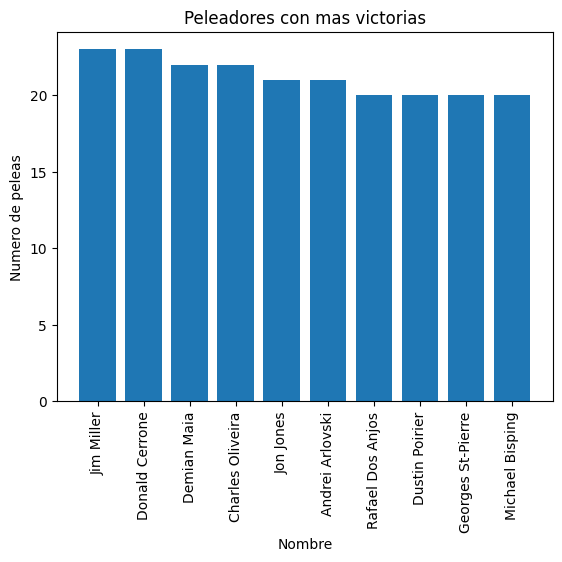

In [18]:
winnerFrequency = df['FIGHT_WINNER'].value_counts()
top_10_modas = winnerFrequency.head(10)

plt.bar(top_10_modas.index, top_10_modas.values)
plt.xticks(rotation=90)
plt.xlabel('Nombre')
plt.ylabel('Numero de peleas')
plt.title('Peleadores con mas victorias')

plt.show()